Human Activity Recognition Using Smartphones Dataset:
==================
- Data analysis conducted for part of my bachelor's thesis.
    - Author:  Eemil Nyyssönen
- Date: 10.11.2021.

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

License:
========
Use of this dataset in publications must be acknowledged by referencing the following publication [1] 

[1] Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 

This dataset is distributed AS-IS and no responsibility implied or explicit can be addressed to the authors or their institutions for its use or misuse. Any commercial use is prohibited.


## Importing libraries:


In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot theming

plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rc('font',**{'family':'serif','serif':['Times']})

sns.set(rc={'figure.figsize':(20,10)})

LABEL_NAMES = ['WALKING',' WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

## 1) Describing the data:

In [2]:
PATH  = '../uci_har_data/' # parent directory for  the dataset
paths = [PATH+'train/X_train.txt', PATH+'train/y_train.txt' , PATH+'test/X_test.txt', PATH+'test/y_test.txt' ]

# get name of the features
with open(PATH+'/features.txt') as f:
    feature_names = np.array([name.split()[-1] for name in f], str)

# get the raw acceleration data, paths gravity removed
INERTIAL_PATH = '../uci_har_data/train/Inertial Signals/'
fnames_train_raw = np.array(os.listdir(INERTIAL_PATH)[:3])
    

In [3]:
def make_datasets(paths: list) :
    """Load the data from .txt files

    Args:
        paths (list): List containing paths as strings that point to data. 

    Returns:
        dict.dict_values: dictionary values containing the training and test datasets
    """
    data_dict = {
        'X_train': None,
        'y_train': None, 
        'X_test': None, 
        'y_test': None,
    }
    for path in paths:
        d = path.split('/')[-1][:-4] #train or test
        with open(path) as f:
            try:
                data_dict[d] = np.array([np.array(np.float16(line.split())) for line in f])
            except Exception as e:
                print(e)
    
    return data_dict.values()

X_train, y_train, X_test, y_test = make_datasets(paths)

# raw features
X_train_raw = np.empty((X_train.shape[0]*128, fnames_train_raw.shape[0]))
for idx, filename in enumerate(fnames_train_raw):
    X_train_raw[:,idx] = np.ravel(np.loadtxt(INERTIAL_PATH+filename))

print(f'X_train raw shape: {X_train_raw.shape}')

# labels for raw inertial features
y_raw = np.empty(X_train.shape[0]*128)
for idx in range(0, y_raw.shape[0], 128):
    for j in range(idx-128, idx):
        y_raw[j] = y_train[idx//128]

print(f'y_raw shape: {y_raw.shape}')

# make pandas df
df_inertial_data = pd.DataFrame(X_train_raw, columns = ['X', 'Y', 'Z'])
df_inertial_data['class'] = y_raw

X_train raw shape: (941056, 3)
y_raw shape: (941056,)


In [4]:
df_inertial_data

,X,Y,Z,class
0,0.022859,0.010767,0.102934,5.0
1,0.010316,0.006579,0.105687,5.0
2,0.013250,0.008929,0.102102,5.0
3,0.017751,0.007489,0.106553,5.0
4,0.002553,0.006141,0.102814,5.0
...,...,...,...,...
941051,-0.226884,-0.280075,-0.205803,5.0
941052,-0.313591,-0.248612,-0.180733,5.0
941053,-0.362512,-0.194322,-0.156105,5.0
941054,-0.383989,-0.147070,-0.122798,5.0


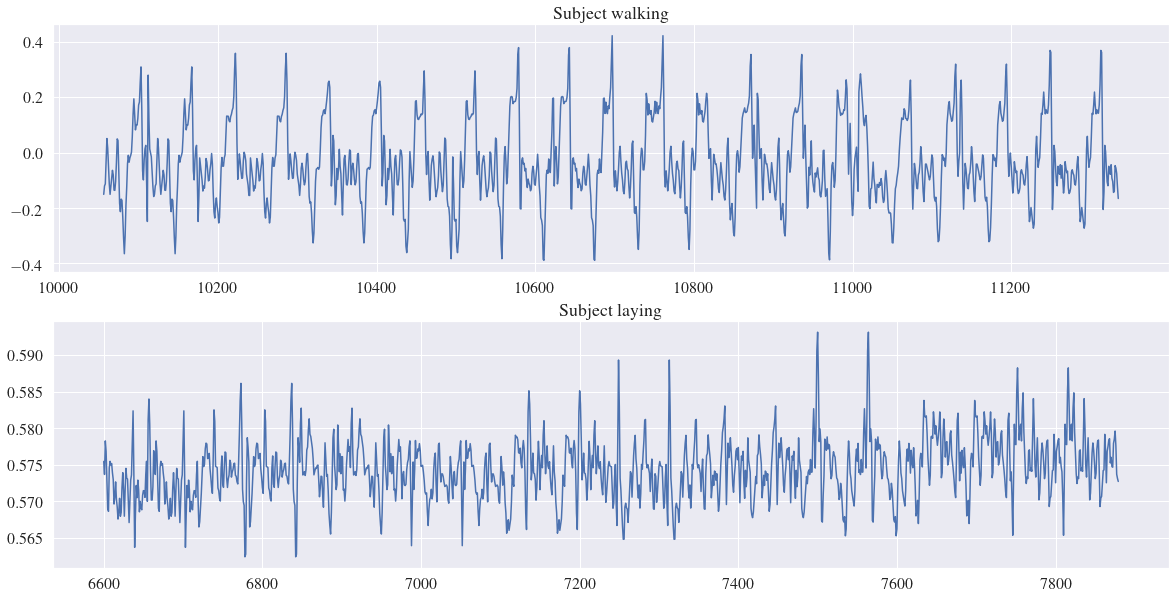

In [5]:
n_samples = X_train_raw.shape[0]
Fs = 50 #sampling rate 
t_window = 2.56*10 #sliding window size, 10 samples

params = {'legend.fontsize': 16,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':32,
         'xtick.labelsize':16,
         'ytick.labelsize':16}

plt.rcParams.update(params)

plt.rc('font',**{'family':'serif','serif':['Times']})

#Plot subject walking z-axis vs subject laying z-axis (classes 1 and 6)
f, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))

walking_window = np.arange(list(y_raw).index(1)+1/Fs+200,list(y_raw).index(1) + np.floor(Fs*t_window)+200)
laying_window = np.arange(list(y_raw).index(6)+1/Fs+200, list(y_raw).index(6) + np.floor(Fs*t_window)+200)
T = [walking_window, laying_window]

for i in range(len(T)):
    ax[i].plot(df_inertial_data.iloc[T[i], 2])

#plt.suptitle('Z-axis acceleration data', size=24)
ax[0].set_title(f'Subject walking', size=18)
ax[1].set_title(f'Subject laying', size=18)

plt.show()

Samples: 1280
Time: 25.6s


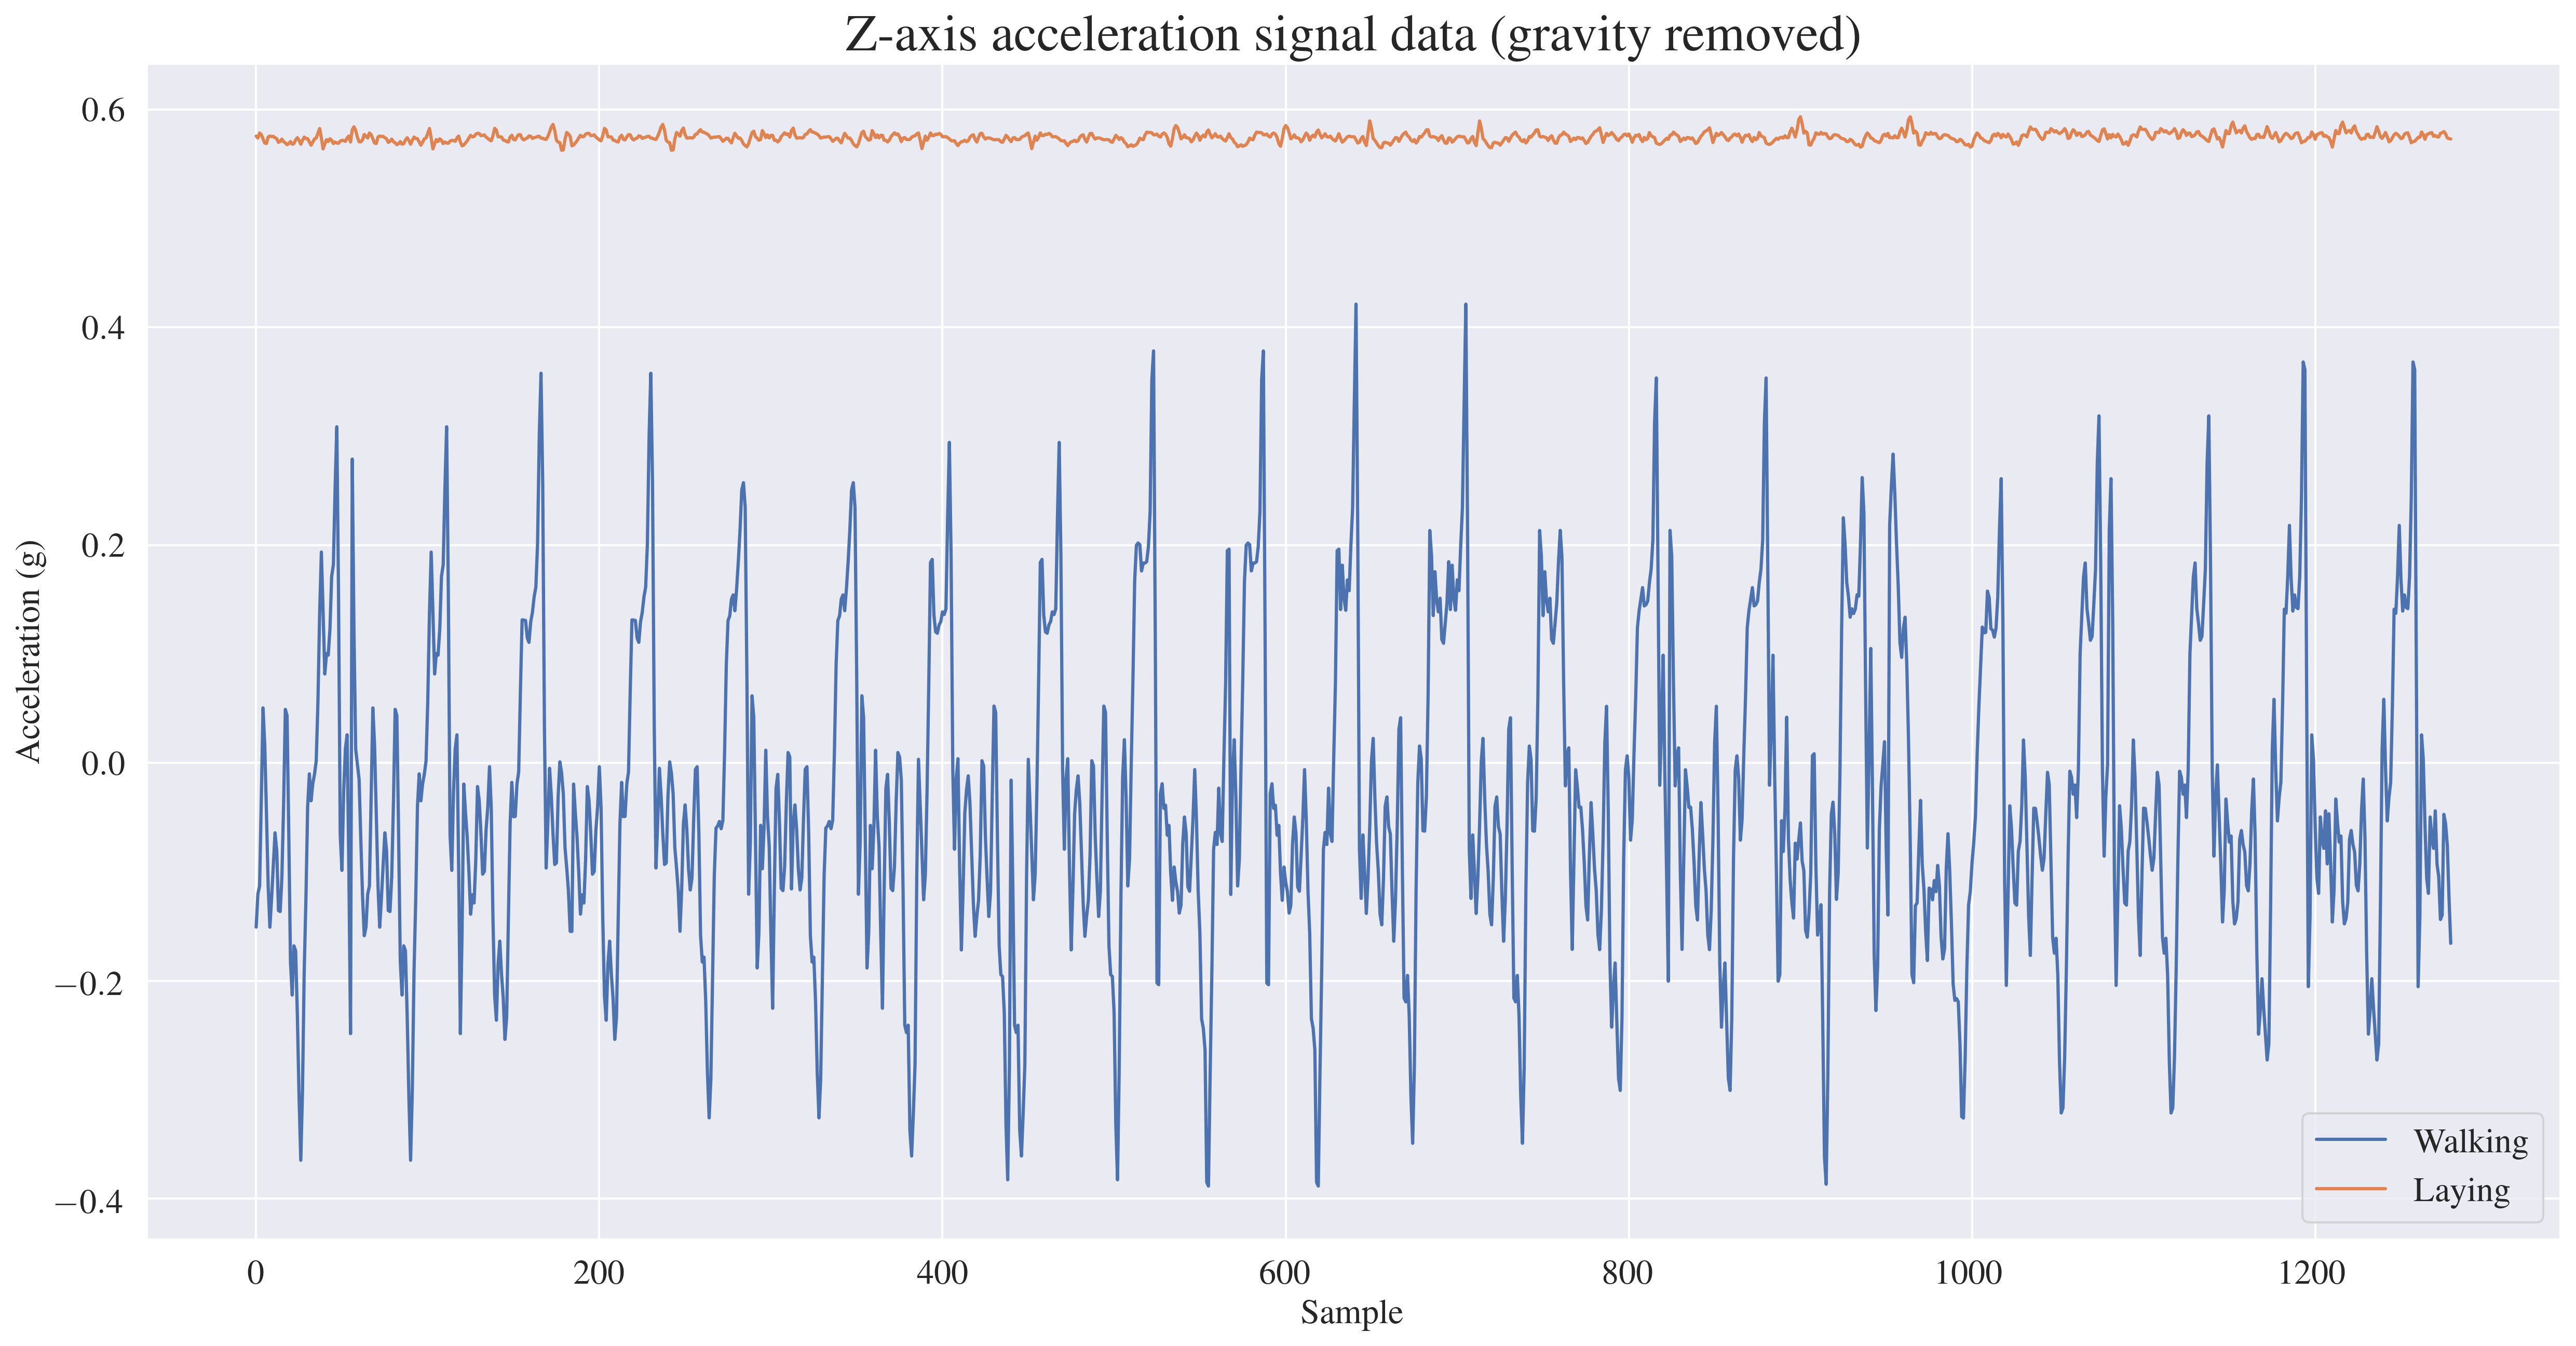

In [6]:
samples = np.arange(len(walking_window))

plt.figure(figsize=(20,10), dpi = 300)
plt.plot(samples, df_inertial_data.iloc[walking_window, 2], label = 'Walking')
plt.plot(samples, df_inertial_data.iloc[laying_window, 2], label = 'Laying')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Acceleration (g)')
plt.title("Z-axis acceleration signal data (gravity removed)", size = 24)

print(f"Samples: {len(walking_window)}")
print(f"Time: {1/Fs*len(walking_window)}s")

In [7]:
df_inertial_data.iloc[T[1], 3]

6600    6.0
6601    6.0
6602    6.0
6603    6.0
6604    6.0
       ... 
7875    6.0
7876    6.0
7877    6.0
7878    6.0
7879    6.0
Name: class, Length: 1280, dtype: float64

## Explore the data
Check for class imbalances, and data dimension, visualize data

In [8]:
# Data dimesnions
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [9]:
# reshape labels into 1d vector
y_train, y_test = np.ravel(y_train), np.ravel(y_test)
y_train.shape, y_test.shape

((7352,), (2947,))

In [10]:
# Dataframe for full data
df = pd.DataFrame(data = np.concatenate((X_train, X_test)), columns=feature_names)
df['class'] = np.concatenate((y_train, y_test))
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",class
0,0.288574,-0.020294,-0.132935,-0.995117,-0.982910,-0.913574,-0.995117,-0.983398,-0.923340,-0.934570,...,-0.298584,-0.710449,-0.112732,0.030396,-0.464844,-0.018448,-0.841309,0.179932,-0.058624,5.0
1,0.278320,-0.016403,-0.123535,-0.998047,-0.975098,-0.960449,-0.999023,-0.975098,-0.957520,-0.942871,...,-0.595215,-0.861328,0.053467,-0.007435,-0.732422,0.703613,-0.844727,0.180298,-0.054321,5.0
2,0.279541,-0.019470,-0.113464,-0.995605,-0.967285,-0.979004,-0.996582,-0.963867,-0.977539,-0.938477,...,-0.390869,-0.760254,-0.118530,0.177856,0.100708,0.808594,-0.849121,0.180664,-0.049103,5.0
3,0.279053,-0.026199,-0.123291,-0.996094,-0.983398,-0.990723,-0.997070,-0.982910,-0.989258,-0.938477,...,-0.117310,-0.482910,-0.036774,-0.012894,0.640137,-0.485352,-0.848633,0.181885,-0.047668,5.0
4,0.276611,-0.016571,-0.115356,-0.998047,-0.980957,-0.990723,-0.998535,-0.979492,-0.990234,-0.942383,...,-0.351562,-0.699219,0.123291,0.122559,0.693359,-0.616211,-0.847656,0.185181,-0.043884,5.0
5,0.277100,-0.010101,-0.105164,-0.997559,-0.990723,-0.995605,-0.997559,-0.990234,-0.995605,-0.942383,...,-0.545410,-0.844727,0.082642,-0.143433,0.275146,-0.368164,-0.849609,0.184814,-0.042114,5.0
6,0.279541,-0.019638,-0.110046,-0.997070,-0.967285,-0.982910,-0.997070,-0.966309,-0.982910,-0.940918,...,-0.217163,-0.564453,-0.212769,-0.230591,0.014633,-0.189453,-0.852051,0.182129,-0.042999,5.0
7,0.277344,-0.030487,-0.125366,-0.996582,-0.966797,-0.981445,-0.996582,-0.966309,-0.982910,-0.940918,...,-0.082336,-0.421631,-0.020889,0.594238,-0.562012,0.467285,-0.851074,0.183838,-0.041962,5.0
8,0.277344,-0.021744,-0.120728,-0.997559,-0.961426,-0.983887,-0.997559,-0.957031,-0.984375,-0.940430,...,-0.269287,-0.572754,0.012955,0.080933,-0.234253,0.117798,-0.848145,0.188965,-0.037354,5.0
9,0.280518,-0.009964,-0.106079,-0.994629,-0.972656,-0.986328,-0.995605,-0.973633,-0.985840,-0.939941,...,0.339600,0.140503,-0.020584,-0.127686,-0.482910,-0.070679,-0.848145,0.190308,-0.034424,5.0


In [11]:
# statistics
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",class
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274414,-0.017746,-0.108948,-0.607910,-0.510254,-0.612793,-0.633301,-0.525879,-0.614746,-0.466797,...,-0.298584,-0.617676,0.007706,0.002649,0.017685,-0.009216,-0.496338,0.063232,-0.054291,3.623047
std,0.067627,0.037109,0.053040,0.438721,0.500000,0.403809,0.413330,0.484131,0.398926,0.538574,...,0.320312,0.308838,0.336670,0.447510,0.616211,0.484863,0.511230,0.305420,0.269043,1.744141
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262695,-0.024902,-0.121033,-0.992188,-0.977051,-0.979004,-0.993164,-0.977051,-0.979004,-0.935547,...,-0.536133,-0.841797,-0.124695,-0.287109,-0.493164,-0.389038,-0.817383,0.002151,-0.131836,2.000000
50%,0.277100,-0.017166,-0.108582,-0.942871,-0.834961,-0.850586,-0.948242,-0.843750,-0.845215,-0.875000,...,-0.335205,-0.703613,0.008148,0.007668,0.017197,-0.007187,-0.715820,0.182007,-0.003881,4.000000
75%,0.288330,-0.010624,-0.097595,-0.250244,-0.057327,-0.278809,-0.302002,-0.087402,-0.288086,-0.014641,...,-0.113159,-0.487915,0.149048,0.291504,0.536133,0.365967,-0.521484,0.250732,0.102966,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [12]:
df.dtypes

tBodyAcc-mean()-X                       float16
tBodyAcc-mean()-Y                       float16
tBodyAcc-mean()-Z                       float16
tBodyAcc-std()-X                        float16
tBodyAcc-std()-Y                        float16
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float16
angle(X,gravityMean)                    float16
angle(Y,gravityMean)                    float16
angle(Z,gravityMean)                    float16
class                                   float16
Length: 562, dtype: object

In [13]:
# Dataframe for training data
df_train = pd.DataFrame(data = X_train, columns = feature_names )
df_train['class'] = y_train
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",class
0,0.288574,-0.020294,-0.132935,-0.995117,-0.982910,-0.913574,-0.995117,-0.983398,-0.923340,-0.934570,...,-0.298584,-0.710449,-0.112732,0.030396,-0.464844,-0.018448,-0.841309,0.179932,-0.058624,5.0
1,0.278320,-0.016403,-0.123535,-0.998047,-0.975098,-0.960449,-0.999023,-0.975098,-0.957520,-0.942871,...,-0.595215,-0.861328,0.053467,-0.007435,-0.732422,0.703613,-0.844727,0.180298,-0.054321,5.0
2,0.279541,-0.019470,-0.113464,-0.995605,-0.967285,-0.979004,-0.996582,-0.963867,-0.977539,-0.938477,...,-0.390869,-0.760254,-0.118530,0.177856,0.100708,0.808594,-0.849121,0.180664,-0.049103,5.0
3,0.279053,-0.026199,-0.123291,-0.996094,-0.983398,-0.990723,-0.997070,-0.982910,-0.989258,-0.938477,...,-0.117310,-0.482910,-0.036774,-0.012894,0.640137,-0.485352,-0.848633,0.181885,-0.047668,5.0
4,0.276611,-0.016571,-0.115356,-0.998047,-0.980957,-0.990723,-0.998535,-0.979492,-0.990234,-0.942383,...,-0.351562,-0.699219,0.123291,0.122559,0.693359,-0.616211,-0.847656,0.185181,-0.043884,5.0


In [14]:
# Check for class imbalances in training data
unique, count = np.unique(y_train, return_counts=True)

#count = df['class'].value_counts().to_numpy()

f = plt.figure(figsize = (20,10))
f.suptitle('Class count')
ax = f.add_subplot(111)
sns.barplot(LABEL_NAMES, count , hue = LABEL_NAMES)

count


array([1226, 1073,  986, 1286, 1374, 1407])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe246573c20> (for post_execute):


RuntimeError: latex was not able to process the following string:
b' WALKING_UPSTAIRS'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/eemilnyyssonen/.matplotlib/tex.cache/2e30497b0e4c09a00e673e7fd0202127.t
ex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./2e30497b0e4c09a00e673e7fd0202127.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...{16.000000}{20.000000}{\rmfamily  WALKING_
                                                  UPSTAIRS}
No pages of output.
Transcript written on 2e30497b0e4c09a00e673e7fd0202127.log.




RuntimeError: latex was not able to process the following string:
b' WALKING_UPSTAIRS'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/eemilnyyssonen/.matplotlib/tex.cache/2e30497b0e4c09a00e673e7fd0202127.t
ex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./2e30497b0e4c09a00e673e7fd0202127.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...{16.000000}{20.000000}{\rmfamily  WALKING_
                                                  UPSTAIRS}
No pages of output.
Transcript written on 2e30497b0e4c09a00e673e7fd0202127.log.




<Figure size 1440x720 with 1 Axes>

In [15]:
unique_test, count_test = np.unique(y_test, return_counts=True)
print(count_test, unique_test)
counts = dict(zip(LABEL_NAMES, list(zip(count_test, count))))

count_table = pd.DataFrame.from_dict(counts, orient = 'index', columns = ['Test', 'Train'])

[496 471 420 491 532 537] [1. 2. 3. 4. 5. 6.]


In [16]:
print(count_table.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Test &  Train \\
\midrule
WALKING            &   496 &   1226 \\
 WALKING\_UPSTAIRS  &   471 &   1073 \\
WALKING\_DOWNSTAIRS &   420 &    986 \\
SITTING            &   491 &   1286 \\
STANDING           &   532 &   1374 \\
LAYING             &   537 &   1407 \\
\bottomrule
\end{tabular}



In [28]:
!pip3 install seaborn 
#fig, ax = plt.subplots(figsize=(20,10))
LABEL_NAMES = ['WALKING',' WALKING\_UPSTAIRS', 'WALKING\_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
# distribution for magnitudes
class_dict = dict(zip(unique, LABEL_NAMES))
hue = [class_dict[label]  for label in df_train['class']]
p = sns.displot(df_train, x = 'fBodyAccMag-mean()', height=10, aspect=1, kind = 'kde' , fill = True, bw_adjust=.45,  palette = 'deep', hue = hue)#sns.kdeplot(df[['fBodyAccMag-mean()', 'class']].groupby(by ='class'))


     |████████████████████████████████| 296kB 654kB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 7.3MB 773kB/s eta 0:00:01
     |████████████████████████████████| 512kB 8.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
     |████████████████████████████████| 901kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 40kB 9.5MB/s  eta 0:00:01
     |████████████████████████████████| 71kB 13.6MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 102kB 1.4MB/s ta 0:00:01


AttributeError: module 'seaborn' has no attribute 'displot'

As we can see the magitude gives us some elementary information that the classes are easily separable. We now plot the classes separated to active and inactive classes to see the denstities. 

In [23]:
# inactive classes
def plot_inactive(axis):
    df_tmp = df_train[df_train['class'] > 3]
    hue = [class_dict[label]  for label in df_tmp['class']]

    p = sns.kdeplot(
        data=df_tmp,
        x='fBodyAccMag-mean()',
        hue = hue,
        shade=True,
        palette = 'crest',
        #bw_adjust=.9,
        ax = axis,
        cut = 0,
        #multiple='stack',
        
    )
    p.set_title('Inactive classes')
    p.set_xlim([-1.005,-0.85]) 

# active classes
def plot_active(axis):
    df_tmp = df_train[df_train['class'] < 4]
    hue = [class_dict[label]  for label in df_tmp['class']]

    p = sns.kdeplot(
        data = df_tmp, 
        x = 'fBodyAccMag-mean()', 
        hue = hue,
        shade = True,
        palette ='crest', 
        #bw_adjust=.9,
        ax = axis ,
        cut = 0,
        #multiple="stack",
    )
    p.set_title('Active classes')
    p.set_xlim([-0.75,1.00]) 

def plot_total(axis):
    hue = [class_dict[label]  for label in df_train['class']]
    p = sns.kdeplot(
        data=df_train, 
        x = 'fBodyAccMag-mean()', 
        shade=True,
        #bw_adjust=.45,  
        palette = 'crest', 
        hue = hue,
        ax = axis,
        cut=0
    )
    p.set_title('All classes')
    p.set_xlim([df_train['fBodyAccMag-mean()'].min() ,df_train['fBodyAccMag-mean()'].max()])

/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


TypeError: _bivariate_kdeplot() got multiple values for argument 'x'

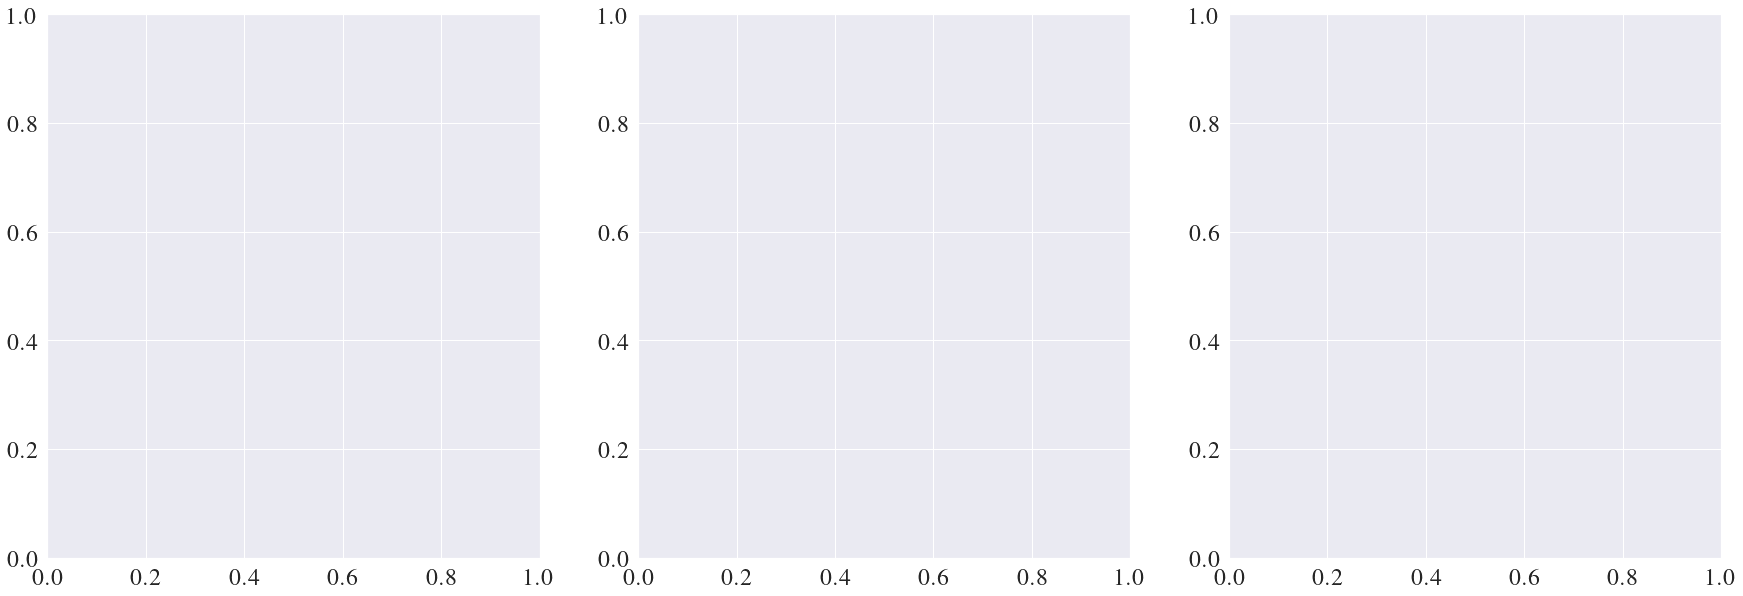

In [24]:
params = {'legend.fontsize': 24,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 32,
         'axes.titlesize':64,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

plt.rc('font',**{'family':'serif','serif':['Times']})

# clean merged fig for thesis
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize=[30,10])
plot_active(ax[0])
plot_inactive(ax[1])
plot_total(ax[2])
f.tight_layout()


# Buiding the neuralnet model
Build two models: 
====
- Vanilla neuralnet using SGD based, simple mlp (library neuralnet)
- CNN following the proposed model in paper2.pdf

In [25]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow import keras

batch_size = 128
MAX_EPOCHS = 100
dropout = 0.2
num_classes = 7

ImportError: dlopen(/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tfe.so, 0x0002): Library not loaded: @rpath/_pywrap_tensorflow_internal.so
  Referenced from: /Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tfe.so
  Reason: tried: '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/eemilnyyssonen/opt/anaconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/local/lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/lib/_pywrap_tensorflow_internal.so' (no such file)

## Sequential DNN model using keras
Architecture based on https://ieeexplore-ieee-org.libproxy.aalto.fi/stamp/stamp.jsp?tp=&arnumber=9176239

In [ ]:
# Architecture
model = Sequential(
    [
        layers.Dense(256, activation = 'relu'),
        layers.Dropout(dropout),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu'),
        # output
        layers.Dense(num_classes, activation='softmax') #output logprobs
    ]
)

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# compile and build model using categorical crossentropy-loss, and adam optimizer
model.compile(loss=tf.losses.CategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=METRICS)
model.build(X_train.shape)

#print stats
model.summary()

In [ ]:
#train the model
history = model.fit(
                      X_train,
                      tf.keras.utils.to_categorical(y_train), #transform labels into categorical form
                      epochs=MAX_EPOCHS,
                      validation_split=0.2,
                      batch_size = batch_size, 
                      verbose=0 
                      )
    

## Performance analysis


In [ ]:
# plot of loss and accuracy as a function of training epochs
f, ax = plt.subplots()
f.suptitle('Model performance (validation on test data)')
for key, val in history.history.items():
    l = key.replace('_', ' ')
    if 'accuracy' in l or 'loss' in l:
        ax.plot(val, label = l)
        ax.legend()
    

In [ ]:
np.argmin(history.history['val_loss'])

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test) # predict using test data
y_pred = [np.argmax(pred) for pred in y_pred] # compute the class from prob vectors

print(f'F1-score (test): {f1_score(y_true=y_test, y_pred= y_pred, average = "weighted")} \nAccuracy: {accuracy_score(y_true=y_test, y_pred= y_pred)}')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [ ]:
model.evaluate(X_test, tf.keras.utils.to_categorical(y_test), batch_size = 32)

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)#, normalize = 'true')

ticks = [label.replace('_', ' ') for label in LABEL_NAMES] #latex formatting

sns.heatmap(cm, annot= True, annot_kws={'size': '24'}, cmap='Blues', fmt = 'd',
            linewidths=1.5, xticklabels=ticks, yticklabels=ticks, )
#plt.ylabel('Actual class')
#plt.xlabel('Predicted class')
#plt.xticks(rotation=45)
#plt.yticks(rotation=45)


In [ ]:
# Plot of loss, precision, recall and precision-recall curve
params = {'legend.fontsize': 16,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':32,
         'xtick.labelsize':16,
         'ytick.labelsize':16}

plt.rcParams.update(params)

plt.rc('font',**{'family':'serif','serif':['Times']})

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')


plot_metrics(history)

In [ ]:
import pydot
import graphviz
tf.keras.utils.plot_model(model, show_shapes=True)

# Support vector classifier

In [26]:
# sklearn svc model
from sklearn.svm import SVC

cf = SVC(kernel = 'rbf') # Gaussian kernel

# train model
cf.fit(X_train, y_train) 

# compute confusion matrix
y_pred = cf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# plot normalized confusion matrix
sns.heatmap(cm, annot= True, annot_kws={'size': '24'}, cmap='Blues', fmt = 'd',
            linewidths=1.5, xticklabels=ticks, yticklabels=ticks, )
#plt.ylabel('Actual class')
#plt.xlabel('Predicted class')
#plt.title('Confusion matrix for SVM with gaussian kernel')

print(f'F1-score (test): {f1_score(y_true=y_test, y_pred= y_pred, average = "weighted")} \nAccuracy (test): {accuracy_score(y_true=y_test, y_pred= y_pred)}')

/Users/eemilnyyssonen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NameError: name 'confusion_matrix' is not defined

In [ ]:
# sklearn svc model
from sklearn.svm import SVC

cf = SVC(kernel = 'rbf') # Gaussian kernel

# train model
cf.fit(X_train_raw, y_train) 

# compute confusion matrix
y_pred = cf.predict(X_test_raw)
cm = confusion_matrix(y_test, y_pred)

# plot normalized confusion matrix
sns.heatmap(cm, annot= True, annot_kws={'size': '24'}, cmap='Blues', fmt = 'd',
            linewidths=1.5, xticklabels=ticks, yticklabels=ticks, )
#plt.ylabel('Actual class')
#plt.xlabel('Predicted class')
#plt.title('Confusion matrix for SVM with gaussian kernel')

print(f'F1-score (test): {f1_score(y_true=y_test, y_pred= y_pred, average = "weighted")} \nAccuracy (test): {accuracy_score(y_true=y_test, y_pred= y_pred)}')

In [ ]:
from sklearn.utils import shuffle
class SoftMarginSVM():
    """ 
    """
    def __init__(self,fdim) -> None:
        self.w = np.zeros(fdim) #weight matrix

    def fit(self, X, y, eta=0.1, xlambda=0.01, C = 1000, niter=10) -> np.ndarray:
       # shuffle(X, y) # draw samples uniformly at random

        for _ in  range(niter):
            for i  in range(X.shape[0]):
                constraint = (y[i]*(self.w.T @ X[i])) < 1 # bool
                # compute the gradient
                if constraint:
                    nabla_J = -y[i] * X[i] + xlambda*self.w
                else: # constraint >= 1 
                    nabla_J = xlambda*self.w
                # update the weights
                self.w = self.w - eta*nabla_J
        
    def pred(self,x):
        return np.where((self.w @ x.T) >= 0.0, 1.0, -1.0)
